## Init

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
NUM_STATES = 'Num States'
ALPHABET_SIZE = 'Alphabet Size'
MISSING_EDGES = 'Missing Edges'
NUM_SAMPLES = 'Num Samples'
SAMPLE_LENGTH = 'Sample Length'
LENGTH_VARIANCE = 'Length Variance'
AUTOMATON_TYPE = 'Automaton Type'
stats_columns = [ NUM_STATES, ALPHABET_SIZE, MISSING_EDGES, NUM_SAMPLES, SAMPLE_LENGTH, LENGTH_VARIANCE, AUTOMATON_TYPE ]

## Data functions

In [78]:
def prepare_data(filenames, skip_error_rows=False):
    data = pd.DataFrame()
    for filename in filenames:
        data = pd.concat([data, pd.read_csv(filename, sep=r'\s*,\s*')])

    error_columns = []
    for col in data.columns:
        if col.startswith('ERROR_'):
            error_columns.append(col)

    time_columns = []
    for col in data.columns:
        if col not in stats_columns and col not in error_columns:
            time_columns.append(col)

    if skip_error_rows:
        error_rows = data.dropna(subset=error_columns)
        data = data.drop(error_rows.index)

    return (data, time_columns, error_columns)

## Plot functions

In [79]:
def plot_avg(data, time_columns, error_columns, COLUMN_NAME, bucket_size=10):
    max_val = data[COLUMN_NAME].max()
    data = data[data[COLUMN_NAME] != max_val].copy()

    COLUMN_NAME_BUCKET = COLUMN_NAME+'_BUCKET'
    data[COLUMN_NAME_BUCKET] = (data[COLUMN_NAME] // bucket_size) * bucket_size

    avg_times_bucketted = data.groupby(COLUMN_NAME_BUCKET)[time_columns].mean()

    for col in time_columns:
        plt.plot(avg_times_bucketted.index, avg_times_bucketted[col], label=col)

    plt.xlabel(f'Sample Length (Bucketted by {bucket_size})')
    plt.ylabel('Average Time (ms)')
    plt.legend()
    plt.title('Average Time vs. Sample Length')
    plt.tight_layout()
    plt.show()

In [85]:
def plot_error(data, error_columns):
    error_counts = data[error_columns].count()
    plt.bar(error_counts.index, error_counts.values)
    plt.xlabel('Algorithm')
    plt.ylabel('Count of Errors')
    plt.title('Count of Errors per Algorithm')
    plt.show()

## Plot

/tmp/ipython-input-1392239205.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.concat([data, pd.read_csv(filename, sep=r'\s*,\s*')])


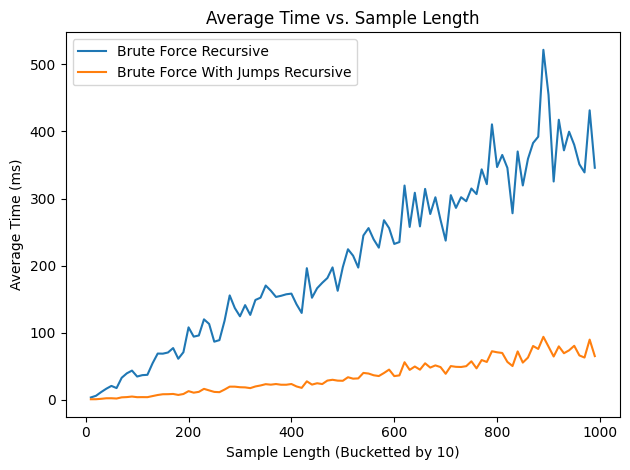

In [80]:
data_sample_len, time_cols_sample_len, error_cols_sample_len = prepare_data(['sample-len_20-5-4-30-X.csv'])
plot_avg(data_sample_len, time_cols_sample_len, error_cols_sample_len, SAMPLE_LENGTH)

/tmp/ipython-input-1392239205.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.concat([data, pd.read_csv(filename, sep=r'\s*,\s*')])


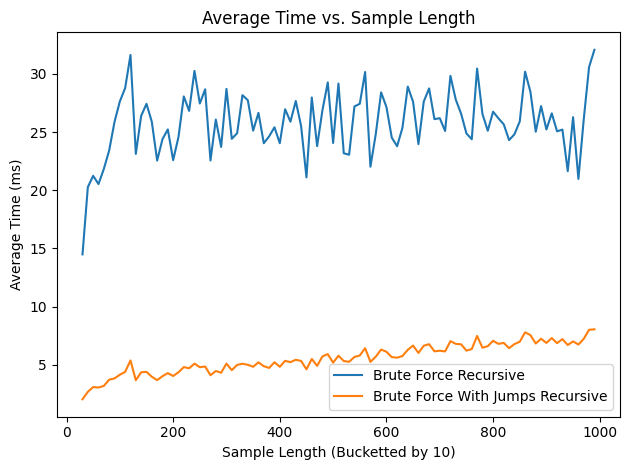

In [81]:
data_sample_cnt, time_cols_sample_cnt, error_cols_sample_cnt = prepare_data(['sample-cnt_20-5-4-X-30.csv'])
plot_avg(data_sample_cnt, time_cols_sample_cnt, error_cols_sample_cnt, NUM_SAMPLES, bucket_size=10)

/tmp/ipython-input-1392239205.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.concat([data, pd.read_csv(filename, sep=r'\s*,\s*')])


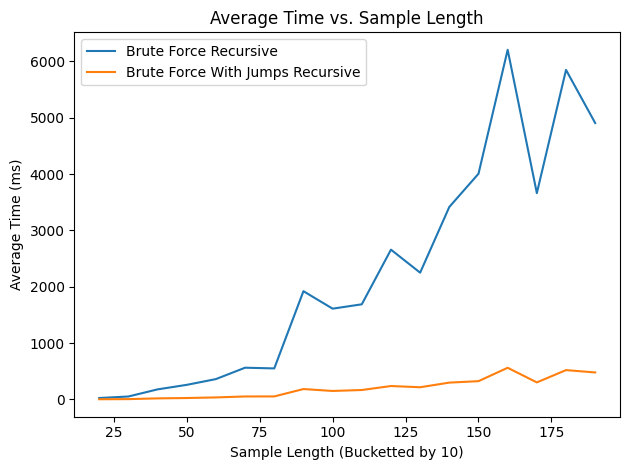

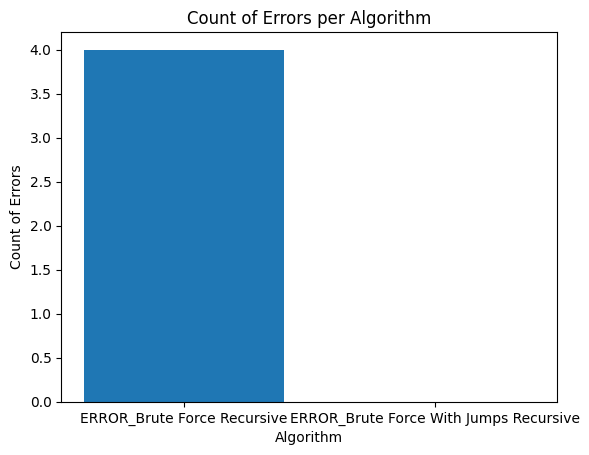

In [87]:
data_num_states, time_cols_num_states, error_cols_num_states = prepare_data(['num-states_X-5-4-30-30.csv'])
plot_avg(data_num_states, time_cols_num_states, error_cols_num_states, NUM_STATES, bucket_size=10)
plot_error(data_num_states, error_cols_num_states)